In [232]:
import numpy as np
import matplotlib.pyplot as plt

In [233]:
X = np.random.randn(1000,1)

In [234]:
Y = 2 + X*3.7 + np.random.randn(1000,1)

In [235]:
Phi = np.hstack((np.ones((1000,1)),X))

In [236]:
w = np.random.randn(2,1)

In [237]:
eta = 1e-4

In [238]:
epochs = 2000

In [239]:
Errors = np.empty(epochs)

In [240]:
for i in range(epochs):
    E = (Y-Phi@w).T@(Y-Phi@w)
    Errors[i] = E
    grad = Phi.T@(Phi@w-Y)
    w -= eta*grad

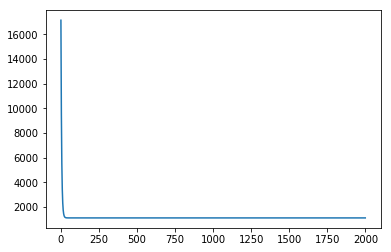

In [241]:
plt.plot(Errors)

In [242]:
newPhi = np.hstack((Phi,np.random.randn(1000,100)))


In [243]:
newW = np.random.randn(newPhi.shape[1],1)
eta = 1e-6
epochs=4000
Errors =np.empty(epochs)
for i in range(epochs):
    E = (Y-newPhi@newW).T@(Y-newPhi@newW)
    Errors[i] = E
    grad = newPhi.T@(newPhi@newW-Y)
    newW -= eta*grad

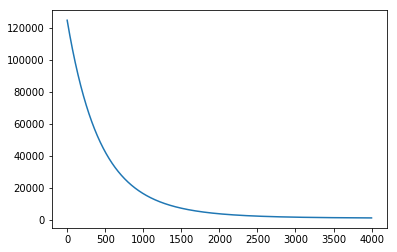

In [244]:
plt.plot(Errors)

In [249]:
Rsq = 1-((Y-Phi@w).T@(Y-Phi@w))/((Y-Y.mean()).T@(Y-Y.mean()))

In [250]:
Rsq

array([[0.92917013]])

In [251]:
Rsqnew = 1-((Y-newPhi@newW).T@(Y-newPhi@newW))/((Y-Y.mean()).T@(Y-Y.mean()))

In [252]:
Rsqnew

array([[0.92458147]])

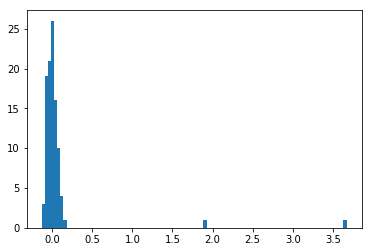

In [253]:
plt.hist(newW,bins=100)
plt.show()

L1 regularization (LASSO)

In [254]:
regW=np.random.randn(newPhi.shape[1],1)
lamb=0.0001
Errors=[]
# gradient descent loop 
for i in range(epochs):
    Errors.append(((newPhi@regW-Y).T@(newPhi@regW-Y)).flatten())
    regW-= eta*newPhi.T@(newPhi@regW-Y)+ lamb*(np.sign(regW))

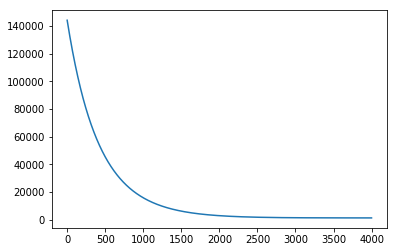

In [255]:
plt.plot(Errors)

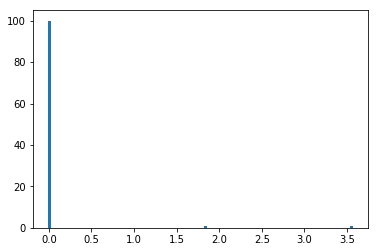

In [256]:
plt.hist(regW,bins=100)
plt.show()

In [257]:
RsqL = 1-((Y-newPhi@regW).T@(Y-newPhi@regW))/((Y-Y.mean()).T@(Y-Y.mean()))

In [258]:
RsqL


array([[0.92539062]])